# 1. Importing libraries

In [1]:
# Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
# Network
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
tensorflow.__version__

'2.10.1'

In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3953390953236827948
xla_global_id: -1
]


# 2. Data Preprocessing

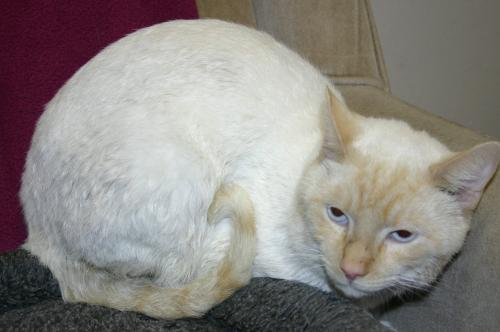

In [14]:
import PIL

PIL.Image.open("./PetImages/Cat/56.jpg")

In [16]:
from tqdm import tqdm
from PIL import Image
import glob
import os
cats = glob.glob("./PetImages/Cat/*.*", recursive=True)
for file in tqdm(cats):
    try:
        image1 = Image.open(file)
    except:
        os.remove(file)
        print("deleting file ", file)

 71%|███████   | 8864/12500 [00:24<00:09, 376.13it/s]

deleting file  ./PetImages/Cat\666.jpg


100%|██████████| 12500/12500 [00:34<00:00, 364.39it/s]


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    "PetImages",
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    "PetImages", # same directory as training data
    target_size=(128, 128),
    batch_size=64,
    class_mode='binary',
    subset='validation') # set as validation data

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


# 3. Building CNN

## Initialising

In [18]:
# The CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

# 4. Training the CNN

## Training and evaluating

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, validation_steps=15)

Epoch 1/15
 41/157 [======>.......................] - ETA: 1:28 - loss: 0.6927 - accuracy: 0.5553

C:\PycharmProjects\ml_lab\ml_lab\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


157/157 [==============================] - 129s 821ms/step - loss: 0.6099 - accuracy: 0.6525 - val_loss: 0.5594 - val_accuracy: 0.7052
Epoch 2/15
157/157 [==============================] - 131s 832ms/step - loss: 0.5056 - accuracy: 0.7481 - val_loss: 0.4370 - val_accuracy: 0.7917
Epoch 3/15
157/157 [==============================] - 131s 833ms/step - loss: 0.4492 - accuracy: 0.7870 - val_loss: 0.4402 - val_accuracy: 0.7885
Epoch 4/15
157/157 [==============================] - 128s 816ms/step - loss: 0.4173 - accuracy: 0.8069 - val_loss: 0.4100 - val_accuracy: 0.8208
Epoch 5/15
157/157 [==============================] - 127s 811ms/step - loss: 0.3939 - accuracy: 0.8197 - val_loss: 0.4001 - val_accuracy: 0.8135
Epoch 6/15
157/157 [==============================] - 129s 819ms/step - loss: 0.3605 - accuracy: 0.8401 - val_loss: 0.3838 - val_accuracy: 0.8250
Epoch 7/15
157/157 [==============================] - 136s 867ms/step - loss: 0.3374 - accuracy: 0.8511 - val_loss: 0.3298 - val_accura

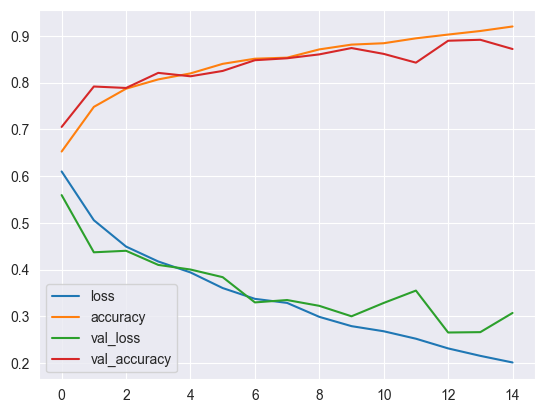

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot();

In [21]:
model.save("model_tf")

INFO:tensorflow:Assets written to: model_tf\assets


# 5. Single prediction

In [22]:
import numpy as np
from tensorflow.keras.utils import load_img

img = load_img('data/single_prediction/cat_or_dog_1.jpg', target_size=(128, 128))

test_img = np.expand_dims(img, axis=0) # batch dimension

result = model.predict(test_img)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

Prediction: dog


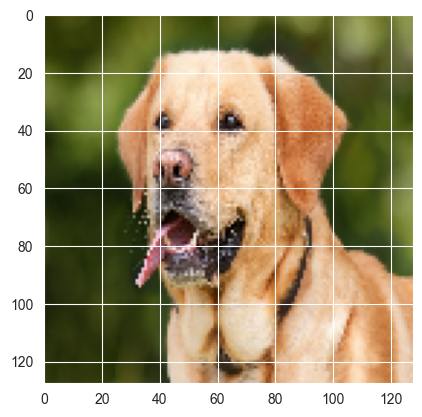

In [23]:
import matplotlib.pyplot as plt

plt.imshow(img)
print(f"Prediction: {prediction}")